Imports

In [191]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib as plt
import sqlite3

Read in data

In [192]:
swiftdf = pd.read_csv("/Users/burnesbrown1/Documents/Coding Temple/Coding_Temple_Two/tableau data pipeline /tswift assignment/taylor_train.csv", encoding='unicode_escape')

In [193]:
swiftdf.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


Formate opening act column

In [194]:
swiftdf['Opening act(s)'] = swiftdf['Opening act(s)'].str.replace('\r\n', ' & ') 

In [195]:
swiftdf.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


In [196]:
#Clean Revenue
swiftdf[['$', 'Revenue']] = swiftdf['Revenue'].str.split('$', expand=True)

In [197]:
swiftdf.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,$
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463","360,617",Fearless_Tour,
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822","340,328",Fearless_Tour,
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764","650,420",Fearless_Tour,
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,,None,Fearless_Tour,
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751","398,154",Fearless_Tour,


Split ticket sold and ticket available

In [198]:
swiftdf[['ticket sold', 'ticket available']] = swiftdf['Attendance (tickets sold / available)'].str.split('/', expand=True)
swiftdf[['ticket sold', 'ticket available']] 

,ticket sold,ticket available
0,"7,463","7,463"
1,"7,822","7,822"
2,"13,764","13,764"
3,,None
4,"8,751","8,751"
...,...,...
440,"72,805","72,805"
441,"43,907","43,907"
442,"35,749","35,749"
443,"100,109","100,109"


Remove commas from numbers

In [199]:
swiftdf["Revenue"] = swiftdf["Revenue"].str.replace(',','')
swiftdf["ticket sold"] = swiftdf["ticket sold"].str.replace(',','')
swiftdf["ticket available"] = swiftdf["ticket available"].str.replace(',','')


In [200]:
swiftdf.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,$,ticket sold,ticket available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463",360617,Fearless_Tour,,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822",340328,Fearless_Tour,,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764",650420,Fearless_Tour,,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,,None,Fearless_Tour,,,None
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751",398154,Fearless_Tour,,8751,8751


In [201]:
swiftdf["ticket sold"] = swiftdf["ticket sold"].str.replace(',','')
swiftdf["ticket available"] = swiftdf["ticket available"].str.replace(',','')
swiftdf.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,$,ticket sold,ticket available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463",360617,Fearless_Tour,,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822",340328,Fearless_Tour,,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764",650420,Fearless_Tour,,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,,None,Fearless_Tour,,,None
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751",398154,Fearless_Tour,,8751,8751


In [202]:
swiftdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   445 non-null    object
 1   Country                                445 non-null    object
 2   Venue                                  445 non-null    object
 3   Opening act(s)                         444 non-null    object
 4   Attendance (tickets sold / available)  442 non-null    object
 5   Revenue                                406 non-null    object
 6   Tour                                   445 non-null    object
 7   $                                      442 non-null    object
 8   ticket sold                            442 non-null    object
 9   ticket available                       407 non-null    object
dtypes: object(10)
memory usage: 34.9+ KB


In [203]:
swiftdf.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,$,ticket sold,ticket available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463",360617,Fearless_Tour,,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822",340328,Fearless_Tour,,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764",650420,Fearless_Tour,,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,,None,Fearless_Tour,,,None
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751",398154,Fearless_Tour,,8751,8751


Manage data types

In [204]:
#tickets available to number and fill null with mean
swiftdf['ticket available'] = pd.to_numeric(swiftdf['ticket available'], errors='coerce')
fill_available = swiftdf['ticket available'].mean()
swiftdf['ticket available'].fillna(fill_available, inplace=True)

In [205]:
swiftdf['ticket sold'] = pd.to_numeric(swiftdf['ticket sold'], errors='coerce')
fill_available = swiftdf['ticket sold'].mean()
swiftdf['ticket sold'].fillna(fill_available, inplace=True)

In [206]:
swiftdf['Revenue'] = pd.to_numeric(swiftdf['Revenue'], errors='coerce')
fill_available = swiftdf['Revenue'].mean()
swiftdf['Revenue'].fillna(fill_available, inplace=True)

In [207]:
swiftdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   City                                   445 non-null    object 
 1   Country                                445 non-null    object 
 2   Venue                                  445 non-null    object 
 3   Opening act(s)                         444 non-null    object 
 4   Attendance (tickets sold / available)  442 non-null    object 
 5   Revenue                                445 non-null    float64
 6   Tour                                   445 non-null    object 
 7   $                                      442 non-null    object 
 8   ticket sold                            445 non-null    float64
 9   ticket available                       445 non-null    float64
dtypes: float64(3), object(7)
memory usage: 34.9+ KB


In [208]:
swiftdf.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,$,ticket sold,ticket available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463",3.606170e+05,Fearless_Tour,,7463.000000,7463.000000
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822",3.403280e+05,Fearless_Tour,,7822.000000,7822.000000
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764",6.504200e+05,Fearless_Tour,,13764.000000,13764.000000
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,,3.892357e+06,Fearless_Tour,,38954.904177,39002.093366
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751",3.981540e+05,Fearless_Tour,,8751.000000,8751.000000


Drop unncesary columns 

In [209]:
swiftdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   City                                   445 non-null    object 
 1   Country                                445 non-null    object 
 2   Venue                                  445 non-null    object 
 3   Opening act(s)                         444 non-null    object 
 4   Attendance (tickets sold / available)  442 non-null    object 
 5   Revenue                                445 non-null    float64
 6   Tour                                   445 non-null    object 
 7   $                                      442 non-null    object 
 8   ticket sold                            445 non-null    float64
 9   ticket available                       445 non-null    float64
dtypes: float64(3), object(7)
memory usage: 34.9+ KB


In [210]:
swiftdf.isnull().sum()

City                                     0
Country                                  0
Venue                                    0
Opening act(s)                           1
Attendance (tickets sold / available)    3
Revenue                                  0
Tour                                     0
$                                        3
ticket sold                              0
ticket available                         0
dtype: int64

In [211]:
swiftdf['$'].isnull().sum()

3

In [212]:
swiftdf.describe()

,Revenue,ticket sold,ticket available
count,4.450000e+02,445.000000,445.000000
mean,3.892357e+06,38954.904177,39002.093366
std,4.131775e+06,33447.651363,33429.123926
min,1.533030e+05,3421.000000,3962.000000
25%,1.041935e+06,13952.000000,13952.000000
50%,2.379870e+06,27877.000000,27877.000000
75%,4.268678e+06,49464.000000,49464.000000
max,2.203139e+07,174764.000000,174764.000000


In [213]:
swiftdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   City                                   445 non-null    object 
 1   Country                                445 non-null    object 
 2   Venue                                  445 non-null    object 
 3   Opening act(s)                         444 non-null    object 
 4   Attendance (tickets sold / available)  442 non-null    object 
 5   Revenue                                445 non-null    float64
 6   Tour                                   445 non-null    object 
 7   $                                      442 non-null    object 
 8   ticket sold                            445 non-null    float64
 9   ticket available                       445 non-null    float64
dtypes: float64(3), object(7)
memory usage: 34.9+ KB


<Axes: xlabel='Country'>

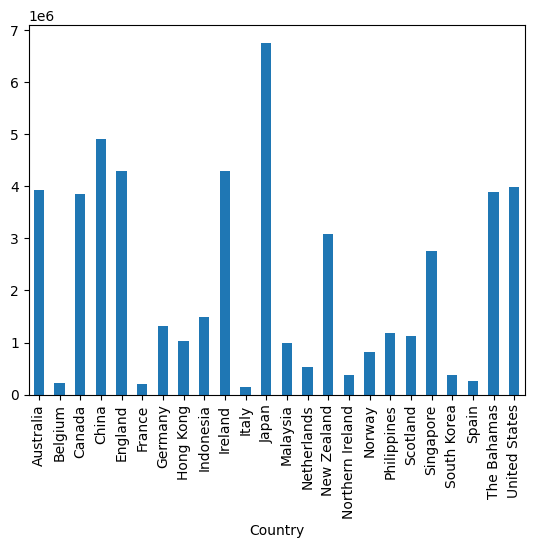

In [224]:
swiftdf.groupby('Country')['Revenue'].mean().plot(kind="bar")


<Axes: xlabel='Tour'>

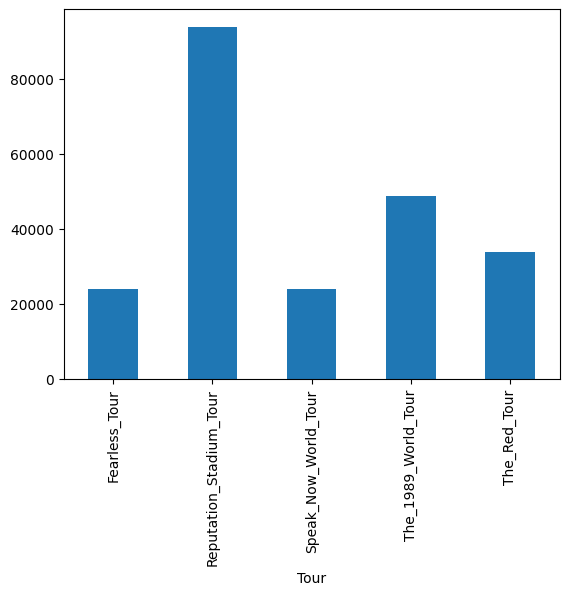

In [219]:
swiftdf.groupby('Tour')['ticket sold'].mean().plot(kind="bar")


save as csv

In [ ]:
swiftdf.to_csv("clean_swift.csv")

SQlite3

In [225]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection(r"C:\sqlite\db\pythonsqlite.db")

2.6.0


/var/folders/x7/2ty286fs747289f1j5ywqzym0000gp/T/ipykernel_69415/1644359053.py:6: DeprecationWarning: version is deprecated and will be removed in Python 3.14
  print(sqlite3.version)
